In [7]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
directory = '/scratch/6256481/'
import sys
sys.path.insert(0, directory + f'python/py_code/')

from support import check_memory, adjust_new_segments
from dem import find_dem_FAB,find_dem_bounds_FAB
from connect_geometries import merge_centerlines

from select_raster import  divide_dataframe_in_equal_parts, multi_save_raster_reach

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
files = np.sort(glob(directory + 'results/new_segments/vector/*'))
sortFiles = pd.read_csv(directory + 'results/file_sorting.csv')
sortFiles = sortFiles.sort_values('size')

In [47]:
sortFiles[sortFiles['file'].str.startswith('af')].sort_values('size')

,Unnamed: 0,file,filePath,size,c,i
42,4,af_04,/scratch/6256481/results/new_segments/vector/a...,1036,af,04
29,3,af_03,/scratch/6256481/results/new_segments/vector/a...,3981,af,03
25,0,af_00,/scratch/6256481/results/new_segments/vector/a...,4083,af,00
22,2,af_02,/scratch/6256481/results/new_segments/vector/a...,4178,af,02
15,1,af_01,/scratch/6256481/results/new_segments/vector/a...,4635,af,01


In [41]:
sortFiles[['c', 'i']] = sortFiles['file'].str.split('_', expand = True)
A = sortFiles.groupby('c', as_index = False)['size'].sum()
A['Rsize'] = (A['size'] / A['size'].sum())*10
A

,c,size,Rsize
0,af,17913,0.890525
1,as,83601,4.156131
2,eu,24792,1.232507
3,na,27785,1.381301
4,oc,12098,0.601439
5,sa,34962,1.738097


In [3]:
newSortFiles = divide_dataframe_in_equal_parts(sortFiles)
multiInput = newSortFiles[['filePath', 'start', 'end', 'order']].values[0:15]

In [ ]:
dfDemBounds = find_dem_bounds_FAB(directory, 'EPSG:4326', False)
R, _= find_dem_FAB(dfReach, 10, dfDemBounds, reachCRS, 'EPSG:4326' )

In [4]:
df = gpd.read_file(multiInput[0][0])
df = adjust_new_segments(df)

In [5]:
ids = df.loc[df['include_flag'] == '0','combined_reach_id'].unique()
dfReach      = df[df['combined_reach_id'] == ids[0]].copy()

print(f'Intiate1: {check_memory()}')

GroupedCRS = dfReach.groupby('localCRS', as_index = False).size()
reachCRS   = GroupedCRS.loc[GroupedCRS['size'] == GroupedCRS['size'].max()
                            ,'localCRS'].iloc[0]
print(f'Intiate2: {check_memory()}')
dfReach      = dfReach.to_crs(reachCRS)

print(f'Intiate3: {check_memory()}')

combinedLine, _, _ = merge_centerlines(dfReach, df, reachCRS)
print(f'Intiate3.1: {check_memory()}')

Intiate1: 176.45
Intiate2: 176.45
Intiate3: 176.93
Intiate3.1: 176.93


In [192]:
import rioxarray
import matplotlib.pyplot as plt

In [26]:
D

NameError: name 'D' is not defined

In [ ]:
def open_FAB_dem_raster(rid, cont, dfDemReach):
    demReachRow = dfDemReach[(dfDemReach['combined_reach_id'] == rid) & (dfDemReach['Continent'] == cont)]
    raster = rioxarray.open_rasterio(demReachRow)

In [27]:
dfR

,Unnamed: 0,combined_reach_id,Continent,bounds,bounds_crs,rasterPath
0,0,12722.0,af,"(439463.0242160363, 8144236.709942166, 450813....",EPSG:32738,/scratch/6256481/input/FAB_dem/S17E044_FABDEM_...
1,0,12721.0,af,"(443570.2349869968, 8142205.112134672, 451249....",EPSG:32738,/scratch/6256481/input/FAB_dem/S17E044_FABDEM_...
2,0,12720.0,af,"(445126.02512828243, 8135942.242917728, 456726...",EPSG:32738,/scratch/6256481/input/FAB_dem/S17E044_FABDEM_...
3,0,12719.0,af,"(452721.2833255717, 8129509.552366584, 461700....",EPSG:32738,/scratch/6256481/input/FAB_dem/S17E044_FABDEM_...
4,0,12718.0,af,"(457498.9357605515, 8124887.410345826, 468514....",EPSG:32738,/scratch/6256481/input/FAB_dem/S17E044_FABDEM_...
...,...,...,...,...,...,...
592,0,3030.0,na,"(443177.1135177183, 5775687.725854344, 467973....",EPSG:32619,/scratch/6256481/input/FAB_dem/N52W070_FABDEM_...
593,0,3029.0,na,"(417046.0189801591, 5771779.20040659, 483279.7...",EPSG:32619,/scratch/6256481/input_created/FAB_dem_reach/n...
594,0,3028.0,na,"(450059.9779335582, 5829788.63692237, 462532.2...",EPSG:32619,/scratch/6256481/input/FAB_dem/N52W070_FABDEM_...
595,0,3035.0,na,"(503044.8318334593, 5404972.112258385, 577556....",EPSG:32619,/scratch/6256481/input_created/FAB_dem_reach/n...


In [18]:
divide_dataframe_in_equal_parts(df)

KeyError: 'size'

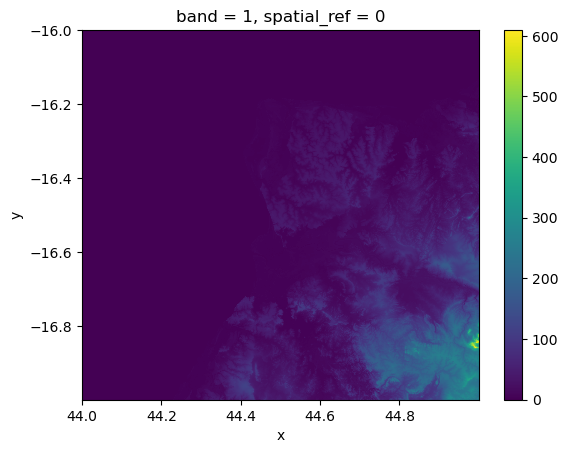

In [195]:
f, ax = plt.subplots()
ax.plot(*combinedLine.xy)
R.plot(ax = ax)
plt.show()

# VRT

In [13]:
import numpy as np
import xarray as xr
from osgeo import gdal, osr
import warnings

In [14]:
# Open the VRT file
vrt_file = directory + "input_created/test.vrt"
vrt_ds = gdal.Open(vrt_file)

In [ ]:
def get_raster_vrt(vrt, dfRIn,bufferSize, localCRS, demCRS):
    dfR = dfRIn.copy(deep = True)
    # print(f'\tFind DEM FAB 2: {check_memory()}')
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dfR.loc[dfRIn.index, 'geometry'] = dfR.geometry.buffer(bufferSize)
    # print(f'\tFind DEM FAB 3: {check_memory()}')
    
    dfR    = dfR.to_crs(demCRS)
    bounds = dfR.geometry.total_bounds

    # Define bounding box (xmin, ymax, xmax, ymin) in the VRT's coordinate system
    bounding_box = (bounds[0], bounds[3], bounds[2], bounds[1])  # bounds in DEM crs

    # Use gdal.Translate to crop the dataset based on bounding box
    cropped_vrt = "cropped.vrt"
    gdal.Translate(cropped_vrt, vrt, projWin=bounding_box, format="VRT")

    # Open the cropped VRT
    cropped_ds = gdal.Open(cropped_vrt)

    # Define output projection (e.g., WGS 84 EPSG:4326)
    reprojected_vrt = "reprojected.vrt"

    # Reproject using gdal.Warp
    gdal.Warp(reprojected_vrt, cropped_ds, dstSRS=localCRS, format="VRT")

    # Open the reprojected dataset
    reproj_ds = gdal.Open(reprojected_vrt)

    # Read raster data as numpy array
    band = reproj_ds.GetRasterBand(1)
    raster_array = band.ReadAsArray()

    # Get geotransform (needed for coordinate mapping)
    gt = reproj_ds.GetGeoTransform()
    xmin, xres, _, ymax, _, yres = gt
    xmax = xmin + (reproj_ds.RasterXSize * xres)
    ymin = ymax + (reproj_ds.RasterYSize * yres)

    # Create coordinate arrays
    x_coords = np.linspace(xmin, xmax, reproj_ds.RasterXSize)
    y_coords = np.linspace(ymax, ymin, reproj_ds.RasterYSize)  # y is reversed

    # Create xarray dataset
    xarr = xr.DataArray(raster_array, coords=[y_coords, x_coords], dims=["y", "x"])

    return xarr


In [20]:
RVRT = get_raster_vrt(vrt_ds, dfReach, 50000, dfReach.iloc[0].localCRS, 'EPSG:4326')

In [17]:
dfDemBounds = find_dem_bounds_FAB(directory, 'EPSG:4326', False)


In [19]:
R, _= find_dem_FAB(dfReach, 50000, dfDemBounds, reachCRS, 'EPSG:4326' )


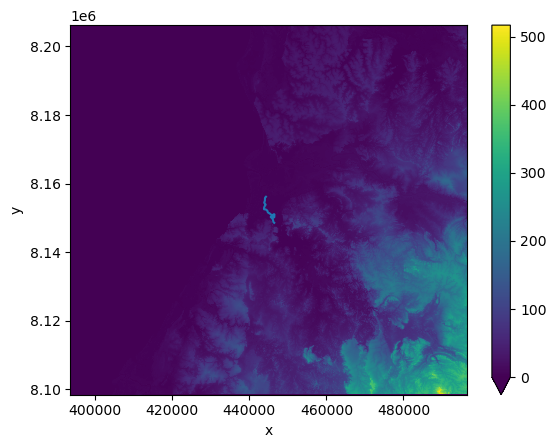

In [21]:
f, ax = plt.subplots()
ax.plot(*combinedLine.xy)
RVRT.plot(vmin = 0)

In [18]:
# Get raster information
print("Raster size:", vrt_ds.RasterXSize, "x", vrt_ds.RasterYSize)
print("Number of bands:", vrt_ds.RasterCount)

Raster size: 1296000 x 504000
Number of bands: 1


In [30]:
reachVRT.total_bounds

array([ 44.47259864, -16.74550014,  44.49822243, -16.67662391])

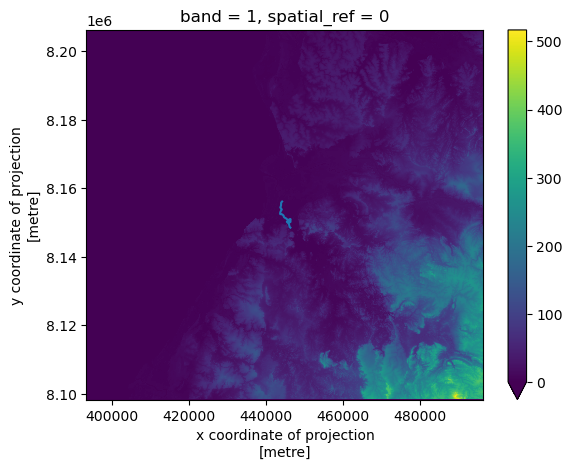

In [22]:
f, ax = plt.subplots()
ax.plot(*combinedLine.xy)
R.plot(ax = ax, vmin = 0)